In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/busiest-airports-of-europe/Busiest-European-Airports-2019.csv
/kaggle/input/busiest-airports-of-europe/Busiest-European-Airports-2020.csv
/kaggle/input/busiest-airports-of-europe/Busiest-European-Airports-2017.csv
/kaggle/input/busiest-airports-of-europe/Busiest-European-Airports-2016.csv
/kaggle/input/busiest-airports-of-europe/Busiest-European-Airports-2021.csv
/kaggle/input/busiest-airports-of-europe/Busiest-European-Airports-2018.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow import keras

2024-03-15 08:59:42.856883: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 08:59:42.857044: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 08:59:43.010759: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [43]:
df = pd.read_csv('/kaggle/input/busiest-airports-of-europe/Busiest-European-Airports-2016.csv')

In [44]:
# files 2016 

df.head(10)

,Rank2016,Airport,City served,Country,Passengers2016,Passengers2015,Change 2016-2015-Num,Change 2016-2015-%
0,1,Heathrow Airport,London,United Kingdom,75711130,74985475,725655,"%0,97"
1,2,Charles de Gaulle Airport,Paris,France,65933145,65766986,166159,"%0,25"
2,3,Amsterdam Airport Schiphol,Amsterdam,Netherlands,63625664,58284848,5340816,"%9,16"
3,4,Frankfurt Airport,Frankfurt,Germany,60786937,61032022,-245085,"-%0,40"
4,5,Istanbul Atatürk Airport,Istanbul,Turkey,60415470,61322729,-907259,"-%1,48"
5,6,Adolfo Suárez Madrid–Barajas Airport,Madrid,Spain,50420583,46824838,3595745,"%7,68"
6,7,Barcelona–El Prat Josep Tarradellas Airport,Barcelona,Spain,44154693,39711237,4443456,"%11,19"
7,8,Gatwick Airport,London,United Kingdom,43119628,40269087,2850541,"%7,08"
8,9,Munich Airport,Munich,Germany,42261309,40981522,1279787,"%3,12"
9,10,Leonardo da Vinci–Fiumicino Airport,Rome,Italy,41744769,40463208,1281561,"%3,17"


In [45]:
df.tail(10)

,Rank2016,Airport,City served,Country,Passengers2016,Passengers2015,Change 2016-2015-Num,Change 2016-2015-%
90,91,Trondheim Airport,Trondheim,Norway,4417490,4352721,64769,"%1,49"
91,92,Bari Airport,Bari,Italy,4322797,3972105,350692,"%8,83"
92,93,Stavanger Airport,Stavanger,Norway,4193665,4499482,-305817,"-%6,80"
93,94,Gdańsk Lech Wałęsa Airport,Gdańsk,Poland,4004081,3706180,297901,"%8,04"
94,95,Beauvais Airport,Beauvais,France,3997856,4330013,-332157,"-%7,67"
95,96,Turin Airport,Turin,Italy,3943298,3659312,283986,"%7,76"
96,97,Vilnius Airport,Vilnius,Lithuania,3934891,3814001,120890,"%3,17"
97,98,Cagliari Airport,Cagliari,Italy,3689747,3714174,-24427,"-%0,66"
98,99,Leeds Bradford Airport,Leeds,United Kingdom,3612061,3446831,165230,"%4,79"
99,100,Nuremberg Airport,Nuremberg,Germany,3485372,3381681,103691,"%3,07"


In [14]:
missing_values = dfs[0].iloc[:, :10].isnull().sum()

missing_values

Rank2016                0
Airport                 0
City served             0
Country                 0
Passengers2016          0
Passengers2015          0
Change 2016-2015-Num    0
Change 2016-2015-%      0
dtype: int64

In [46]:
# Display column names for each dataframe to identify consistent column naming
column_names = [df.columns.tolist() for df in dfs]
column_names

[['Rank2016',
  'Airport',
  'City served',
  'Country',
  'Passengers2016',
  'Passengers2015',
  'Change 2016-2015-Num',
  'Change 2016-2015-%'],
 ['Rank2017',
  'Airport',
  'City served',
  'Country',
  'Passengers2017',
  'Passengers2016',
  'Change 2017–2016-Num',
  'Change 2017-2016-%'],
 ['Rank2018',
  'Airport',
  'City served',
  'Country',
  'Passengers2018',
  'Passengers2017',
  'Change 2018-2017-Num',
  'Change 2018-2017-%'],
 ['Rank2019',
  'Airport',
  'City served',
  'Country',
  'Passengers-2019',
  'Passengers-2018',
  'Change 2019-2018-Num',
  'Change 2019-2018-%'],
 ['Rank2020',
  'Airport',
  'City served',
  'Country',
  'Passengers-2020',
  'Passengers-2019',
  'Change-2020–2019-Num',
  'Change 2020-2019-%'],
 ['Rank2021',
  'Airport',
  'City served',
  'Country',
  'Passengers-2021',
  'Passengers-2020',
  'Change 2021-2020-Num',
  'Change 2021-2020-%']]

In [47]:
# Convert selected columns to numpy arrays based on their positions
numpy_arrays = [df.iloc[:, [4, 5, 6]].to_numpy() for df in dfs]

# Check the shape of each array to confirm successful conversion
[array.shape for array in numpy_arrays]

[(100, 3), (100, 3), (100, 3), (100, 3), (100, 3), (101, 3)]

In [48]:
df.describe()

,Rank2016,Passengers2016,Passengers2015,Change 2016-2015-Num
count,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,50.500000,1.570031e+07,1.484574e+07,8.545688e+05
std,29.011492,1.555428e+07,1.517229e+07,1.127550e+06
min,1.000000,3.485372e+06,3.381681e+06,-2.004256e+06
25%,25.750000,5.188154e+06,4.842822e+06,2.182102e+05
50%,50.500000,9.465666e+06,8.614811e+06,6.587410e+05
75%,75.250000,2.139507e+07,2.031911e+07,1.310973e+06
max,100.000000,7.571113e+07,7.498548e+07,5.340816e+06


In [49]:
# Basic statistics for the 2016 data
min_values = np.min(numpy_arrays[0], axis=0)
max_values = np.max(numpy_arrays[0], axis=0)
mean_values = np.mean(numpy_arrays[0], axis=0)

In [50]:
min_values

array([ 3485372,  3381681, -2004256])

In [51]:
mean_values

array([15700305.86, 14845737.03,   854568.83])

In [52]:
max_values

array([75711130, 74985475,  5340816])

The number of passengers in 2016 for the top 10 busiest European airports

/tmp/ipykernel_33/2691880587.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_airports['Airport'] = top_airports['Airport'].apply(lambda x: x.replace(" Airport", "").replace("–", "-"))


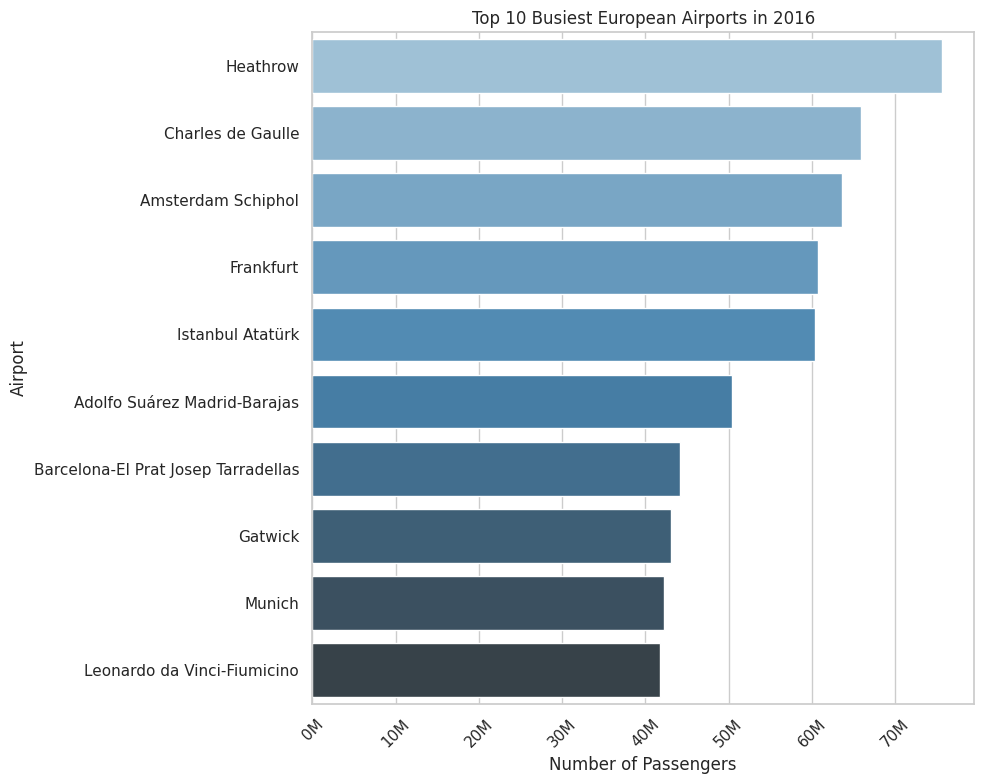

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Prepare data for a meaningful visualization
# It makes sense to visualize the Passengers 2016 data for the top 10 airports to get a sense of their relative sizes
top_airports = df.head(10)
top_airports['Airport'] = top_airports['Airport'].apply(lambda x: x.replace(" Airport", "").replace("–", "-"))

# Create the plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Passengers2016', y='Airport', data=top_airports, palette='Blues_d')

plt.title('Top 10 Busiest European Airports in 2016')
plt.xlabel('Number of Passengers')
plt.ylabel('Airport')

# Improve readability of the x-axis labels
plt.xticks(rotation=45)
plt.gca().get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{int(x/1e6)}M')
)

plt.tight_layout()
plt.show()

Data Visualization ( Histogram ) - The distribution of passenger numbers for 2016

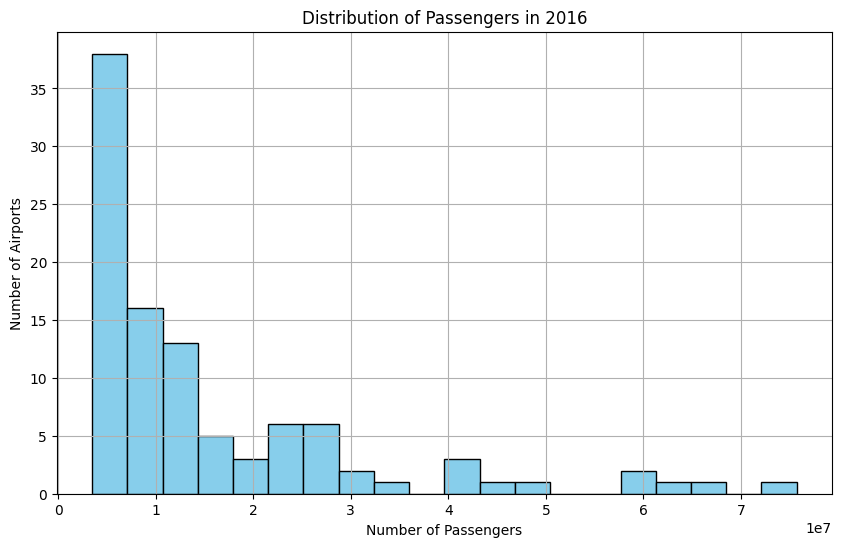

In [53]:
# Histogram of passenger numbers for 2016

plt.figure(figsize=(10, 6))
plt.hist(numpy_arrays[0][:, 0], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Passengers in 2016')
plt.xlabel('Number of Passengers')
plt.ylabel('Number of Airports')
plt.grid(True)
plt.show()


Predicting 2017 passenger numbers based on 2016 numbers using linear regression

In [54]:
# Extracting 2016 and 2017 passenger data
X = numpy_arrays[0][:, 0].reshape(-1, 1)  # Passengers in 2016
y = numpy_arrays[1][:, 0]  # Passengers in 2017

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Scoring the model on the test set
model_score = model.score(X_test, y_test)
model_score

0.9973089787175268

This indicates a very strong linear relationship between passenger numbers in consecutive years for European airports with 0.997 highscore / 97% percent past performance is a strong predictor of future performance 